# Notebook for Deliverable 2

Getting the data:

* Go to https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires?datasetId=2478&sortBy=voteCount
* Download dataset by clicking Download in upper-right.
* Unzip archive and place in 'data' folder in this repo.

In [352]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [353]:
#connect to sqlite db
DB_PATH = './data/FPA_FOD_20170508.sqlite'
db_connection = sqlite3.connect(DB_PATH)

In [354]:
df_tables_in_db = pd.read_sql_query("SELECT name FROM sqlite_schema WHERE type='table' ORDER BY name;", db_connection)

In [355]:
# get a list of all the tables in the DB
df_tables_in_db

,name
0,ElementaryGeometries
1,Fires
2,KNN
3,NWCG_UnitIDActive_20170109
4,SpatialIndex
5,geometry_columns
6,geometry_columns_auth
7,geometry_columns_field_infos
8,geometry_columns_statistics
9,geometry_columns_time


In [356]:
# read the Fires table into a dataframe
df_fires = pd.read_sql_query("SELECT * FROM 'Fires'", db_connection)

In [357]:
# read the Fires Shape table into a dataframe
df_fires_shape = pd.read_sql_query("SELECT * FROM 'idx_Fires_Shape'", db_connection)

### Fires shape

In [358]:
df_fires_shape.shape

(1880465, 5)

In [359]:
df_fires_shape.head()

,pkid,xmin,xmax,ymin,ymax
0,1064078,-166.869400,-166.869385,65.982597,65.982605
1,1064195,-166.269302,-166.269287,65.115898,65.115906
2,1729139,-166.166702,-166.166687,65.833298,65.833305
3,1064196,-166.152725,-166.152695,65.182594,65.182602
4,1064225,-166.029404,-166.029373,65.926895,65.926903


In [360]:
## TODO: is fire shape useful? need to investigate what these values represent and if it can be used

### Fires

In [361]:
df_fires.shape

(1880465, 39)

In [362]:
df_fires.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


In [363]:
df_fires.columns

Index(['OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID', 'MTBS_FIRE_NAME',
       'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE', 'DISCOVERY_DOY',
       'DISCOVERY_TIME', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'CONT_DATE',
       'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE',
       'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY',
       'FIPS_CODE', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [364]:
#Add columns ['DISCOVERY_TIME','CONT_DATE', 'CONT_TIME']
columns_of_interest = ['FIRE_YEAR','STAT_CAUSE_DESCR', 'STAT_CAUSE_CODE','LATITUDE','LONGITUDE','STATE','FIRE_SIZE', 
                       'DISCOVERY_DATE', 'DISCOVERY_TIME','CONT_DATE', 'CONT_TIME']

df_fires[columns_of_interest].head()

,FIRE_YEAR,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME
0,2005,Miscellaneous,9.0,40.036944,-121.005833,CA,0.10,2453403.5,1300,2453403.5,1730
1,2004,Lightning,1.0,38.933056,-120.404444,CA,0.25,2453137.5,0845,2453137.5,1530
2,2004,Debris Burning,5.0,38.984167,-120.735556,CA,0.10,2453156.5,1921,2453156.5,2024
3,2004,Lightning,1.0,38.559167,-119.913333,CA,0.10,2453184.5,1600,2453189.5,1400
4,2004,Lightning,1.0,38.559167,-119.933056,CA,0.10,2453184.5,1600,2453189.5,1200


The DISCOVERY_DATE and CONT_DATE are in Julian Date format. We want to convert them to Gregorian dates (YYYY-MM-DD). We can then use the Gregorian date to get month and day of the week.

In [365]:
df_fires['DISCOVERY_DATE_Greg'] = pd.to_datetime(df_fires['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df_fires['CONT_DATE_Greg'] = pd.to_datetime(df_fires['CONT_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')
df_fires[columns_of_interest+['DISCOVERY_DATE_Greg', 'CONT_DATE_Greg']].head()

,FIRE_YEAR,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,DISCOVERY_DATE_Greg,CONT_DATE_Greg
0,2005,Miscellaneous,9.0,40.036944,-121.005833,CA,0.10,2453403.5,1300,2453403.5,1730,2005-02-02,2005-02-02
1,2004,Lightning,1.0,38.933056,-120.404444,CA,0.25,2453137.5,0845,2453137.5,1530,2004-05-12,2004-05-12
2,2004,Debris Burning,5.0,38.984167,-120.735556,CA,0.10,2453156.5,1921,2453156.5,2024,2004-05-31,2004-05-31
3,2004,Lightning,1.0,38.559167,-119.913333,CA,0.10,2453184.5,1600,2453189.5,1400,2004-06-28,2004-07-03
4,2004,Lightning,1.0,38.559167,-119.933056,CA,0.10,2453184.5,1600,2453189.5,1200,2004-06-28,2004-07-03


In [366]:
# Add month and day of the week
df_fires['DISCOVERY_MONTH'] = pd.DatetimeIndex(df_fires['DISCOVERY_DATE_Greg']).month
df_fires['DISCOVERY_DAY_OF_WEEK'] = df_fires['DISCOVERY_DATE_Greg'].dt.day_name()
df_fires[columns_of_interest+['DISCOVERY_DATE_Greg', 'CONT_DATE_Greg','DISCOVERY_MONTH', 'DISCOVERY_DAY_OF_WEEK']].head()

,FIRE_YEAR,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,DISCOVERY_DATE_Greg,CONT_DATE_Greg,DISCOVERY_MONTH,DISCOVERY_DAY_OF_WEEK
0,2005,Miscellaneous,9.0,40.036944,-121.005833,CA,0.10,2453403.5,1300,2453403.5,1730,2005-02-02,2005-02-02,2,Wednesday
1,2004,Lightning,1.0,38.933056,-120.404444,CA,0.25,2453137.5,0845,2453137.5,1530,2004-05-12,2004-05-12,5,Wednesday
2,2004,Debris Burning,5.0,38.984167,-120.735556,CA,0.10,2453156.5,1921,2453156.5,2024,2004-05-31,2004-05-31,5,Monday
3,2004,Lightning,1.0,38.559167,-119.913333,CA,0.10,2453184.5,1600,2453189.5,1400,2004-06-28,2004-07-03,6,Monday
4,2004,Lightning,1.0,38.559167,-119.933056,CA,0.10,2453184.5,1600,2453189.5,1200,2004-06-28,2004-07-03,6,Monday


In [367]:
# Compute the numebr of days since discovery of the fire til it get contained
df_fires['DAYS_SPENT'] = (df_fires['CONT_DATE_Greg']-df_fires['DISCOVERY_DATE_Greg']).dt.days

# Compute the number of hours since discovery of the fire til it get contained
df_fires['DISCOVERY_TIME'] = pd.to_numeric(df_fires['DISCOVERY_TIME']) #convert Time to integer
df_fires['CONT_TIME'] = pd.to_numeric(df_fires['CONT_TIME'])
df_fires['HRS_SPENT'] = df_fires['DAYS_SPENT']*24 + (df_fires['CONT_TIME']//100 + df_fires['CONT_TIME']%100/60) - (df_fires['DISCOVERY_TIME']//100 + df_fires['DISCOVERY_TIME']%100/60)

df_fires[columns_of_interest+['DISCOVERY_DATE_Greg', 'CONT_DATE_Greg','DAYS_SPENT','HRS_SPENT']].head()

,FIRE_YEAR,STAT_CAUSE_DESCR,STAT_CAUSE_CODE,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,DISCOVERY_DATE,DISCOVERY_TIME,CONT_DATE,CONT_TIME,DISCOVERY_DATE_Greg,CONT_DATE_Greg,DAYS_SPENT,HRS_SPENT
0,2005,Miscellaneous,9.0,40.036944,-121.005833,CA,0.10,2453403.5,1300.0,2453403.5,1730.0,2005-02-02,2005-02-02,0.0,4.50
1,2004,Lightning,1.0,38.933056,-120.404444,CA,0.25,2453137.5,845.0,2453137.5,1530.0,2004-05-12,2004-05-12,0.0,6.75
2,2004,Debris Burning,5.0,38.984167,-120.735556,CA,0.10,2453156.5,1921.0,2453156.5,2024.0,2004-05-31,2004-05-31,0.0,1.05
3,2004,Lightning,1.0,38.559167,-119.913333,CA,0.10,2453184.5,1600.0,2453189.5,1400.0,2004-06-28,2004-07-03,5.0,118.00
4,2004,Lightning,1.0,38.559167,-119.933056,CA,0.10,2453184.5,1600.0,2453189.5,1200.0,2004-06-28,2004-07-03,5.0,116.00


In [368]:
columns_of_interest

['FIRE_YEAR',
 'STAT_CAUSE_DESCR',
 'STAT_CAUSE_CODE',
 'LATITUDE',
 'LONGITUDE',
 'STATE',
 'FIRE_SIZE',
 'DISCOVERY_DATE',
 'DISCOVERY_TIME',
 'CONT_DATE',
 'CONT_TIME']

## 1.) Data Exploration

<AxesSubplot:>

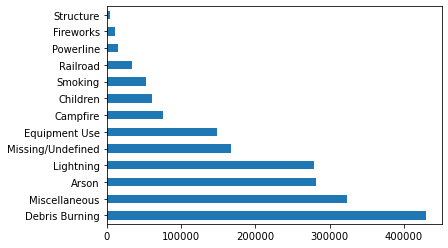

In [369]:
df_fires['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh')

FIRESIZECLASS = Code for fire size based on the number of acres within the final fire perimeter expenditures (A=greater than 0 but less than or equal to 0.25 acres, B=0.26-9.9 acres, C=10.0-99.9 acres, D=100-299 acres, E=300 to 999 acres, F=1000 to 4999 acres, and G=5000+ acres).

FIRE_SIZE = Estimate of acres within the final perimeter of the fire.


<AxesSubplot:>

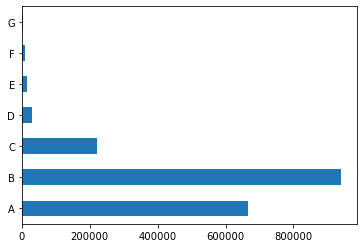

In [370]:
df_fires['FIRE_SIZE_CLASS'].value_counts().sort_index().plot(kind='barh')

<AxesSubplot:>

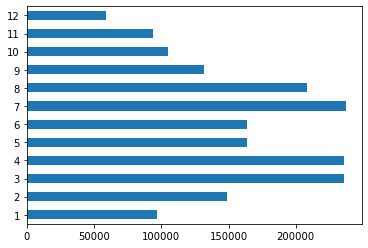

In [371]:
df_fires['DISCOVERY_MONTH'].value_counts().sort_index().plot(kind='barh')

More wildfires occured in spring and summer.

<AxesSubplot:>

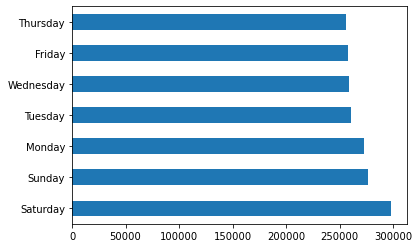

In [372]:
df_fires['DISCOVERY_DAY_OF_WEEK'].value_counts().plot(kind='barh')

Slightly more wildfire occured during weekends.

In [373]:
## Look at value counts by state
## Note that this includes Puerto Rico (PR) and Virgin Islands (VI), so 52 indices total
df_fires['STATE'].value_counts().to_frame()

,STATE
CA,189550
GA,168867
TX,142021
NC,111277
FL,90261
SC,81315
NY,80870
MS,79230
AZ,71586
AL,66570


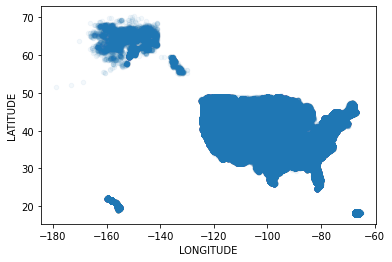

In [374]:
df_fires.plot(kind='scatter', x='LONGITUDE', y='LATITUDE', alpha=0.05)
plt.show()

In [375]:
df_fires['FIRE_YEAR'].value_counts().sort_index()

1992     67975
1993     61989
1994     75955
1995     71472
1996     75574
1997     61450
1998     68370
1999     89363
2000     96416
2001     86587
2002     75656
2003     68261
2004     69279
2005     88604
2006    114004
2007     95573
2008     85378
2009     78325
2010     79889
2011     90552
2012     72769
2013     64780
2014     67753
2015     74491
Name: FIRE_YEAR, dtype: int64

In [376]:
## todo multiple boxplots for categorical data

In [377]:
df_fires['FIRE_SIZE'].describe()

count    1.880465e+06
mean     7.452016e+01
std      2.497598e+03
min      1.000000e-05
25%      1.000000e-01
50%      1.000000e+00
75%      3.300000e+00
max      6.069450e+05
Name: FIRE_SIZE, dtype: float64

<AxesSubplot:title={'center':'log_FIRE_SIZE'}, xlabel='STAT_CAUSE_DESCR'>

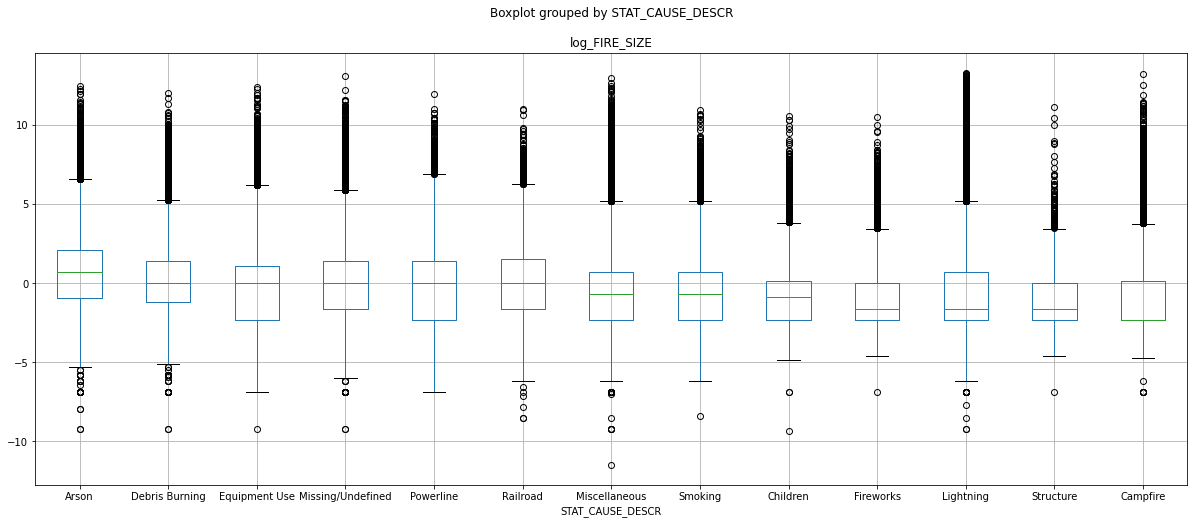

In [378]:
# Ordered boxplot of fire size on cause of fire

#df_fires.boxplot(by ='STAT_CAUSE_DESCR', column =['log_FIRE_SIZE'], grid = True, figsize=(20,8))
df_fires2 = df_fires.copy()
df_fires2['log_FIRE_SIZE'] = np.log(df_fires2['FIRE_SIZE'])
median = df_fires2.groupby(['STAT_CAUSE_DESCR'])['log_FIRE_SIZE'].agg(np.median).sort_values(ascending=False)
ordered_cats = median.index.values
# create categorical data type and set categorical column as new data type
cat_dtype = pd.CategoricalDtype(ordered_cats, ordered=True)
df_fires2['STAT_CAUSE_DESCR'] = df_fires2['STAT_CAUSE_DESCR'].astype(cat_dtype)
# ordered boxplot
df_fires2.boxplot(column='log_FIRE_SIZE', by='STAT_CAUSE_DESCR', figsize=(20,8))

Arson is the cause of fire that reults in the largest fire size on average, while campfire results in the smallest fire.

<AxesSubplot:title={'center':'log_FIRE_SIZE'}, xlabel='FIRE_YEAR'>

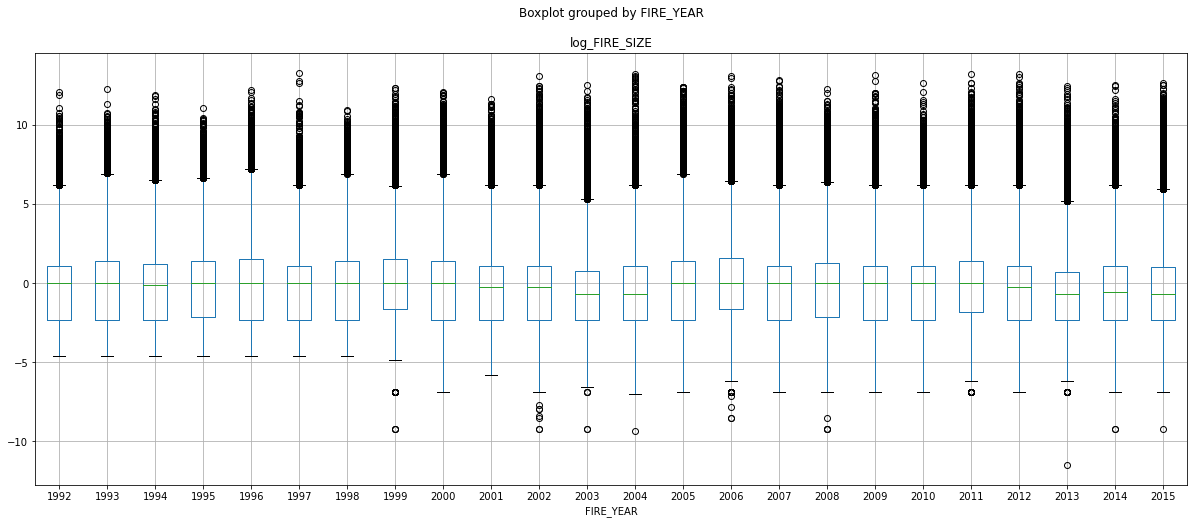

In [380]:
# plot fire size vs fire year
df_fires2.boxplot(by ='FIRE_YEAR', column =['log_FIRE_SIZE'], grid = True, figsize=(20,8))

IS there significant realationship between FIRE_YEAR and FIRESIZE? A cycle of 5-7 years?

<AxesSubplot:title={'center':'log_FIRE_SIZE'}, xlabel='DISCOVERY_MONTH'>

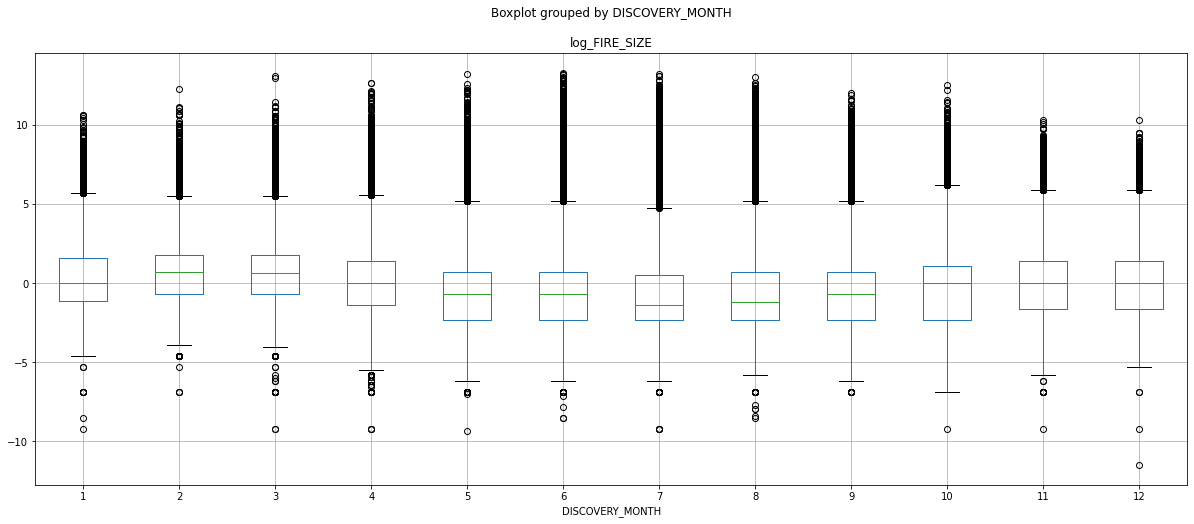

In [384]:
df_fires2.boxplot(by ='DISCOVERY_MONTH', column =['log_FIRE_SIZE'], grid = True, figsize=(20,8))

In [385]:
Fire size tends to be larger in spring (Feb. and Mar.) and winter (Nov., Dec. and Jan.) and smaller in summer.

SyntaxError: invalid syntax (1620921060.py, line 1)

count    892007.000000
mean         30.747923
std         331.550756
min           0.000000
25%           0.500000
50%           1.466667
75%           4.750000
max       87673.500000
Name: HRS_SPENT, dtype: float64

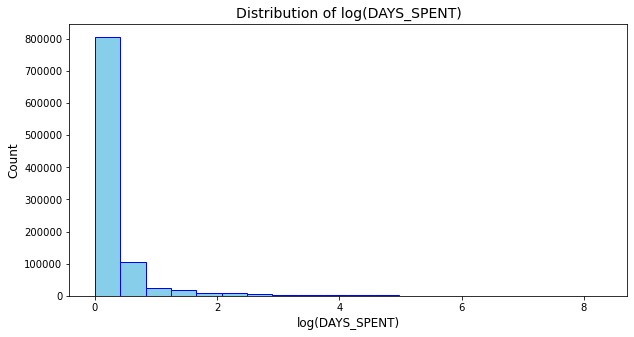

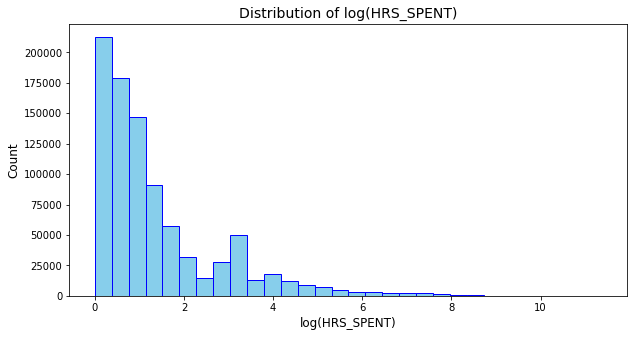

In [386]:
# plot the histogram of log(DAYS_SPENT)
fig = plt.figure(figsize=(10,5))
plt.hist(np.log(df_fires['DAYS_SPENT']+1), bins = 20, color='skyblue', ec="blue")
plt.title('Distribution of log(DAYS_SPENT)', fontsize=14)
plt.xlabel('log(DAYS_SPENT)', fontsize=12)
plt.ylabel('Count', fontsize=12)
df_fires['DAYS_SPENT'].describe()
# plot the histogram of log(HRS_SPENT)
fig = plt.figure(figsize=(10,5))
plt.hist(np.log(df_fires['HRS_SPENT']+1), bins=30, color='skyblue', ec="blue" )
plt.title('Distribution of log(HRS_SPENT)', fontsize=14)
plt.xlabel('log(HRS_SPENT)', fontsize=12)
plt.ylabel('Count', fontsize=12)
df_fires['HRS_SPENT'].describe()

Most of the wildfired were containd within 7 hours or 1.5 days after discovered 

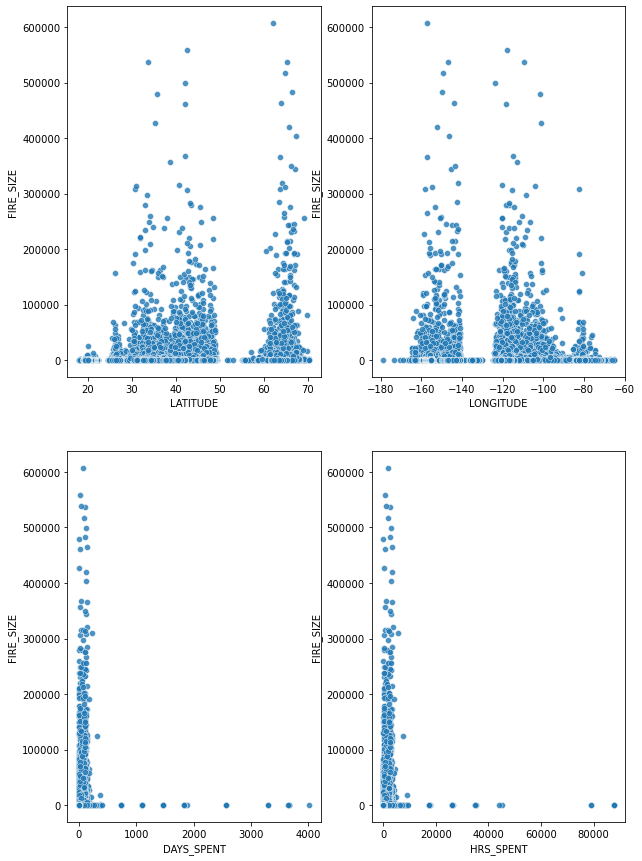

In [387]:
fig, ax = plt.subplots(2,2, figsize=(10,15))
for var, subplot in zip(['LATITUDE', 'LONGITUDE', 'DAYS_SPENT', 'HRS_SPENT'], ax.flatten()):
    sns.scatterplot(x=var, y=df_fires['FIRE_SIZE'], data=df_fires, ax=subplot, alpha=0.80, )


At small DAY_SPENT/HRS_SPENT, we have full range of fire size. Take a closer look at it

<AxesSubplot:xlabel='HRS_SPENT', ylabel='FIRE_SIZE'>

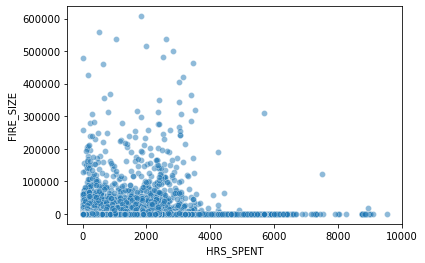

In [392]:
subset1 = df_fires[df_fires['HRS_SPENT'] <= 10000]
sns.scatterplot(x=subset1['HRS_SPENT'], y=subset1['FIRE_SIZE'], data=subset1, alpha=0.50)

C:\Users\Keli Wang\AppData\Local\Temp\ipykernel_18716\2866936044.py:22: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  top = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


<AxesSubplot:>

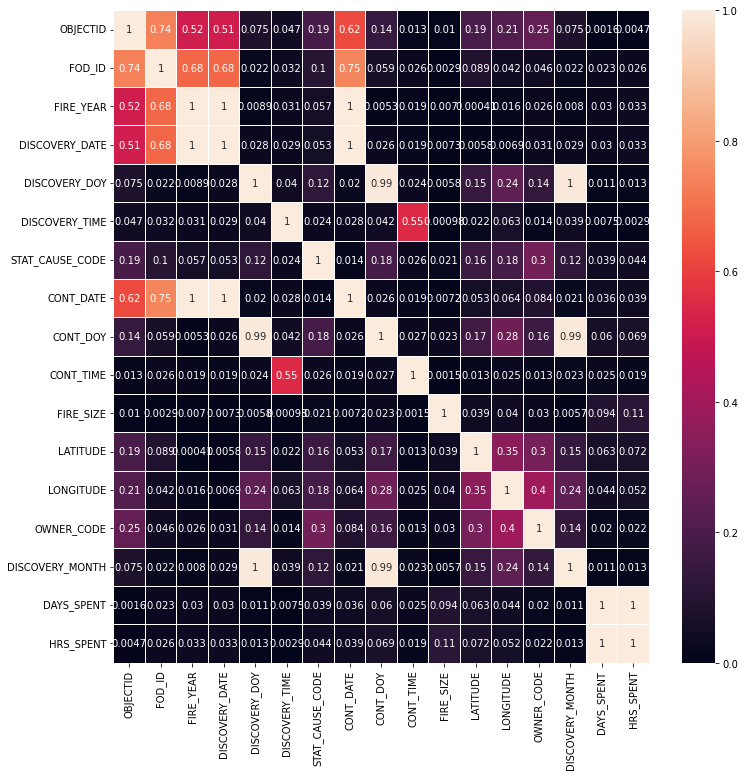

In [389]:
'''
#correlation

def plot_corr(df, size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)    
    plt.show()
    

plot_corr(df_fires)

#TODO show all columns ?
'''
# Show correlations for all columns
# Creating the correlation matrix
corr_mat = df_fires.corr().abs()
top = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
#Plotting the correlation matrix 
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, annot= True, vmin= 0, linewidth=0.5)

#to_drop = [feature for feature in top.columns if any(top[feature] >= 0.90)]
#print(to_drop)

C:\Users\Keli Wang\AppData\Local\Temp\ipykernel_18716\2313570717.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  top = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))


['DISCOVERY_DATE', 'CONT_DATE']


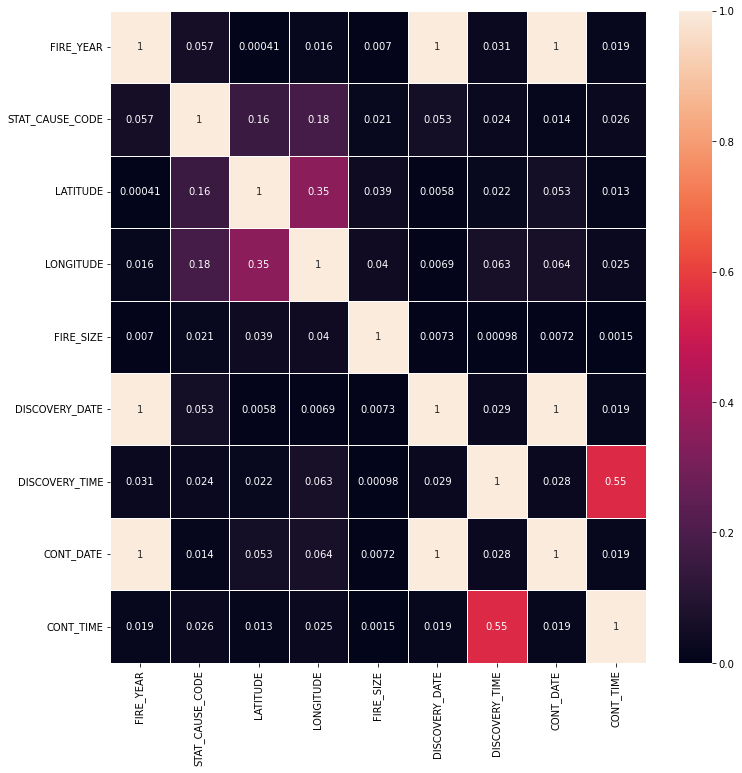

In [390]:
# Show correlations for columns of interest
# Creating the correlation matrix
corr_mat = df_fires[columns_of_interest].corr().abs()
top = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
#Plotting the correlation matrix 
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, annot= True, vmin= 0, linewidth=0.5)

# Finding features with correlation greater than 0.90
to_drop = [feature for feature in top.columns if any(top[feature] >= 0.90)]
print(to_drop)

## 2.) Cleaning and Sampling

In [ ]:
# TODO
# encode qualitative columns: STAT_CAUSE_DESCR, STATE
# parse datetime for DISCOVERY_DATE
#      create day of week and month columns?
# should latitude and longitude be scaled ? how do we effectively use Lat and Long ?

